## Практическая работа

## Цели практической работы

*  решить реальную задачу;
*  потренироваться в обработке данных;
*  обучить различные модели классификации, подобрать гиперпараметры и выбрать лучшую модель;
*  добиться наилучшего качества в задаче.

## Что входит в практическую работу

*  исследование датасета и обработка данных (работа с пропущенными и ошибочными значениями);
*  обучение различных моделей классификации с параметрами по умолчанию;
*  подбор гиперпараметров моделей;
*  смешивание моделей;
*  оценка качества моделей.

## Что оценивается

*  Выполнены все этапы задания: код запускается, отрабатывает без ошибок; подробно и обоснованно написаны текстовые выводы, где это требуется.

## Формат сдачи
Выполните предложенные задания: впишите свой код (или, если требуется, текст) в ячейки после комментариев. 

*Комментарии — это текст, который начинается с символа #. Например: # ваш код здесь.*

Сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

### 1. Загрузите тренировочные и тестовые датасеты

In [1]:
%pip install mlxtend --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install --upgrade category_encoders

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# for Box-Cox Transformation
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

from IPython.display import display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.metrics import mutual_info_score

In [4]:
sns.set(style="ticks") # эта функция меняет глобальные переменные: все последующие графики отрисовываются в том же стиле.
plt.rc('figure', figsize=(18, 6)) # устанавливаем размеры графиков по умолчанию
pd.set_option('display.max_columns', 100) # настрим показ максимального количества столбцов

In [5]:
Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

### 2. Изучите тренировочные и тестовые данные на наличие:
- пропусков,
- ошибочных значений.

Обработайте пропуски и ошибочные значения способом, выбранным по своему усмотрению.

In [6]:
# Ваш код здесь
Xtrain

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,NaN,0.066581,25.606721,0.113590,0.0,0,40,0.244418,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1


In [7]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [8]:
Xtrain.isnull().sum()

f1           0
f2          75
f3           0
f4           0
f5           0
f6           0
f7        1875
f8           0
f9           0
f10          0
f11         10
f12          0
f13          0
f14          0
target       0
dtype: int64

In [9]:
Xtrain.describe(include='all')

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7425.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,5625.000000,7500.000000,7500.000000,7500.000000,7490.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.905308,1.903850e+05,0.238933,10.083200,0.238934,0.240556,0.238933,23.893333,0.238933,1068.693992,88.974933,40.670800,0.238955,0.238933
std,13.647719,76.198282,1.058674e+05,0.151738,2.546071,0.190283,0.147371,0.193365,4.451530,0.087708,7430.344770,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.115721,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.439103,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


In [10]:
Xtrain[['f2', 'f7', 'f11', 'f12']].describe()

,f2,f7,f11,f12
count,7425.000000,5625.000000,7490.000000,7500.000000
mean,238.905308,0.240556,1068.693992,88.974933
std,76.198282,0.147371,7430.344770,404.517032
min,64.259070,0.000000,0.000000,0.000000
25%,218.593930,0.115721,0.000000,0.000000
50%,218.593930,0.241573,0.000000,0.000000
75%,218.593930,0.439103,0.000000,0.000000
max,575.396825,0.482222,99999.000000,4356.000000


In [11]:
Xtrain['f2'].fillna(Xtrain['f2'].mean(), inplace=True)

In [12]:
Xtrain['f7'].fillna(Xtrain['f7'].mean(), inplace=True)

In [13]:
Xtrain.loc[Xtrain['f11'] > 0, 'f11'] = 0

In [14]:
Xtrain.loc[Xtrain['f12'] > 0, 'f12'] = 0

In [15]:
Xtrain[['f2', 'f7', 'f11', 'f12']].describe()

,f2,f7,f11,f12
count,7500.000000,7500.000000,7490.0,7500.0
mean,238.905308,0.240556,0.0,0.0
std,75.816282,0.127624,0.0,0.0
min,64.259070,0.000000,0.0,0.0
25%,218.593930,0.131370,0.0,0.0
50%,218.593930,0.240556,0.0,0.0
75%,238.905308,0.274531,0.0,0.0
max,575.396825,0.482222,0.0,0.0


In [16]:
Xtrain['f11'].fillna(Xtrain['f11'].mean(), inplace=True)

In [17]:
Xtrain.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

In [18]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7500 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      7500 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7500 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [19]:
Xtrain_new = Xtrain.copy()

In [20]:
Xtrain_new.drop(['f11', 'f12'], axis= 1 , inplace= True )

In [21]:
Xtrain_new

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,46,0.185185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,0.240556,0.066581,25.606721,0.113590,40,0.244418,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,50,0.244418,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,45,0.244418,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,40,0.244418,1


In [22]:
numerical = ['f1', 'f2', 'f3', 'f4', 'f6', 'f7', 'f8', 'f9', 'f10', 'f13', 'f14']

In [23]:
Xtrain_new[numerical].corrwith(Xtrain_new.target).sort_values(ascending=False)

f8     0.453420
f6     0.446191
f4     0.355809
f7     0.294786
f1     0.232241
f13    0.223599
f10    0.205664
f2     0.177746
f9     0.104383
f14    0.098095
f3    -0.025223
dtype: float64

In [24]:
Xtrain_new['f5'].unique()

array([ 4, 11,  7, 10,  9, 14, 13, 16, 12,  2, 15,  6,  5,  8,  3,  1],
      dtype=int64)

In [25]:
# Сохранение файла данных для последующего кодирования признаков и моделирования
Xtrain_new.to_csv("TrainData_new.csv", index = False)

In [26]:
Xtest

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,40,238.933333,220589,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,1
2496,54,238.933333,165278,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,1
2497,44,238.933333,398473,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,70,0.238933,1
2498,35,238.933333,183898,0.238933,11,0.238933,0.238933,0.238933,23.893333,0.238933,7298,0,50,0.238933,1


In [27]:
Xtest.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

In [28]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


In [29]:
Xtest[['f11', 'f12']].describe()

,f11,f12
count,2500.000000,2500.00000
mean,1022.667200,83.76080
std,6786.871929,387.72358
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,0.000000,0.00000
max,99999.000000,2559.00000


In [30]:
Xtest.loc[Xtest['f11'] > 0, 'f11'] = 0

In [31]:
Xtest.loc[Xtest['f12'] > 0, 'f12'] = 0

In [32]:
Xtest[['f11', 'f12']].describe()

,f11,f12
count,2500.0,2500.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [33]:
Xtest_new = Xtest.copy()
Xtest_new.drop(['f11', 'f12'], axis= 1 , inplace= True )

In [34]:
Xtest_new

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,40,0.238933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,40,238.933333,220589,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,40,0.238933,1
2496,54,238.933333,165278,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,40,0.238933,1
2497,44,238.933333,398473,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,70,0.238933,1
2498,35,238.933333,183898,0.238933,11,0.238933,0.238933,0.238933,23.893333,0.238933,50,0.238933,1


In [35]:
Xtest_new.to_csv("TestData_new.csv", index = False)

In [36]:
#Загружаем преобразованные данные TrainData_new.csv и TestData_new.csv кодирования и моделирования
df_train = pd.read_csv("TrainData_new.csv")
df_test = pd.read_csv("TestData_new.csv")

In [37]:
df_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,46,0.185185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,0.240556,0.066581,25.606721,0.113590,40,0.244418,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,50,0.244418,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,45,0.244418,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,40,0.244418,1


In [38]:
X_ALL = df_train.drop('target', axis=1)
y = df_train['target']
X_ALL

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,49,0.100000
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,60,0.244418
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,50,0.244418
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,35,0.244418
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,46,0.185185
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,0.240556,0.066581,25.606721,0.113590,40,0.244418
7496,25,218.593930,104439,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,50,0.244418
7497,50,218.593930,162632,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,45,0.244418
7498,51,276.771005,174824,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,40,0.244418


In [39]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # скрипка
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с 'усами'
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

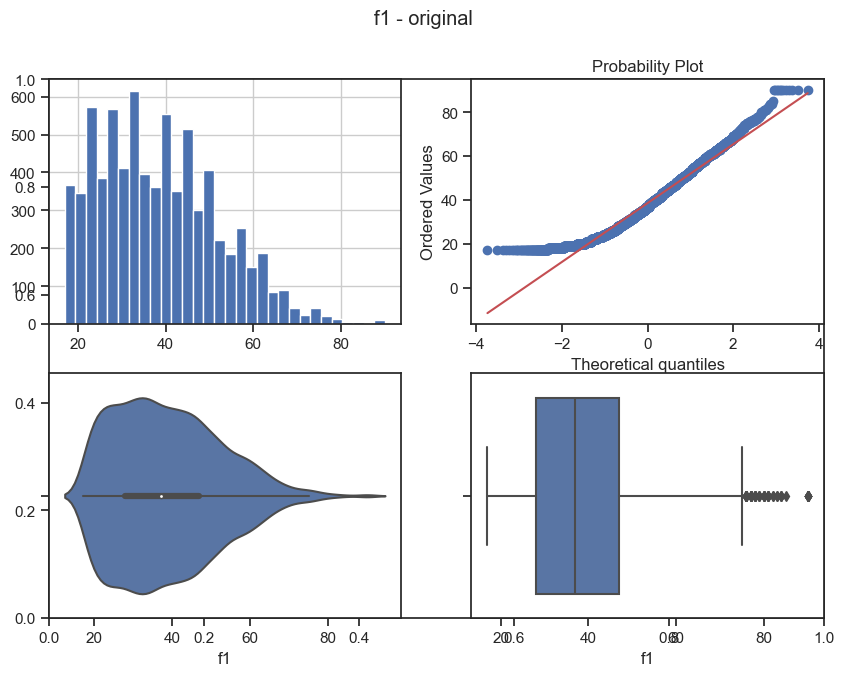

In [40]:
diagnostic_plots(X_ALL, 'f1', 'f1 - original')

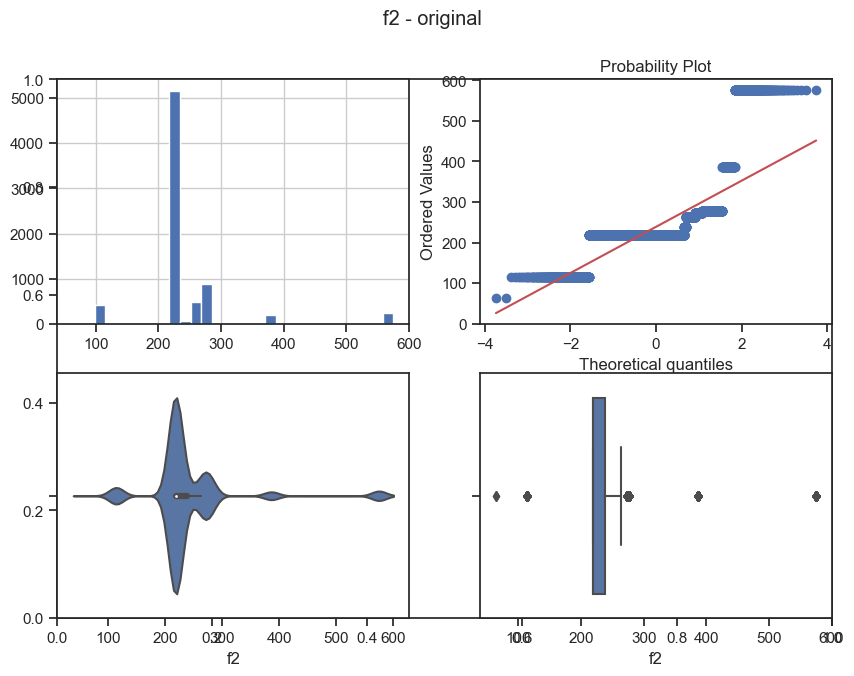

In [41]:
diagnostic_plots(X_ALL, 'f2', 'f2 - original')

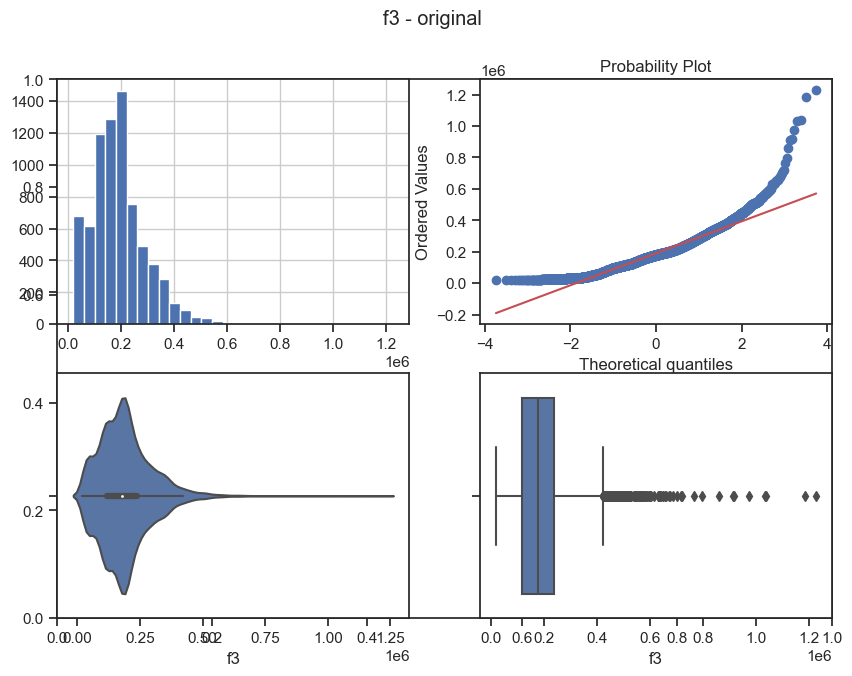

In [42]:
diagnostic_plots(X_ALL, 'f3', 'f3 - original')

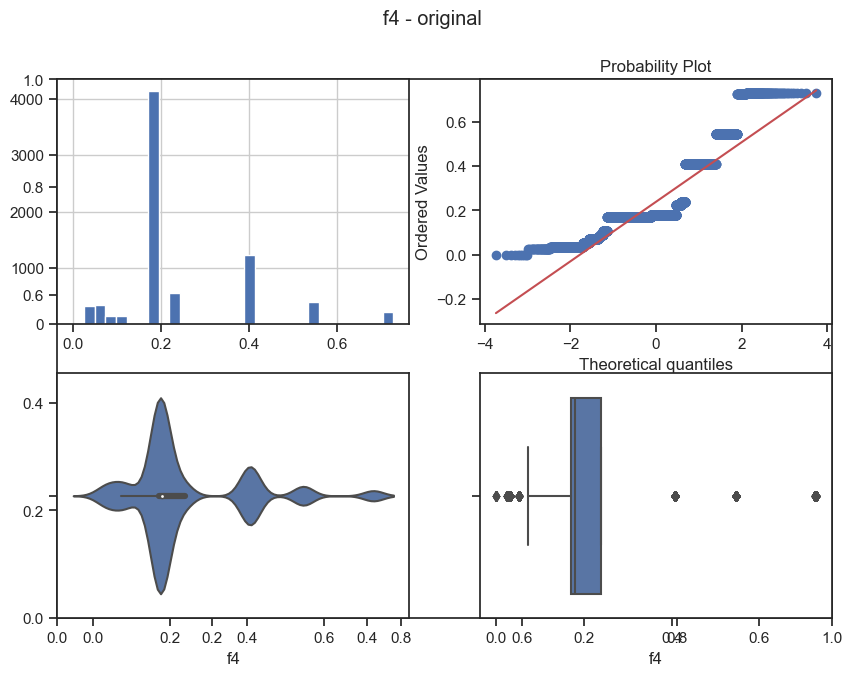

In [43]:
diagnostic_plots(X_ALL, 'f4', 'f4 - original')

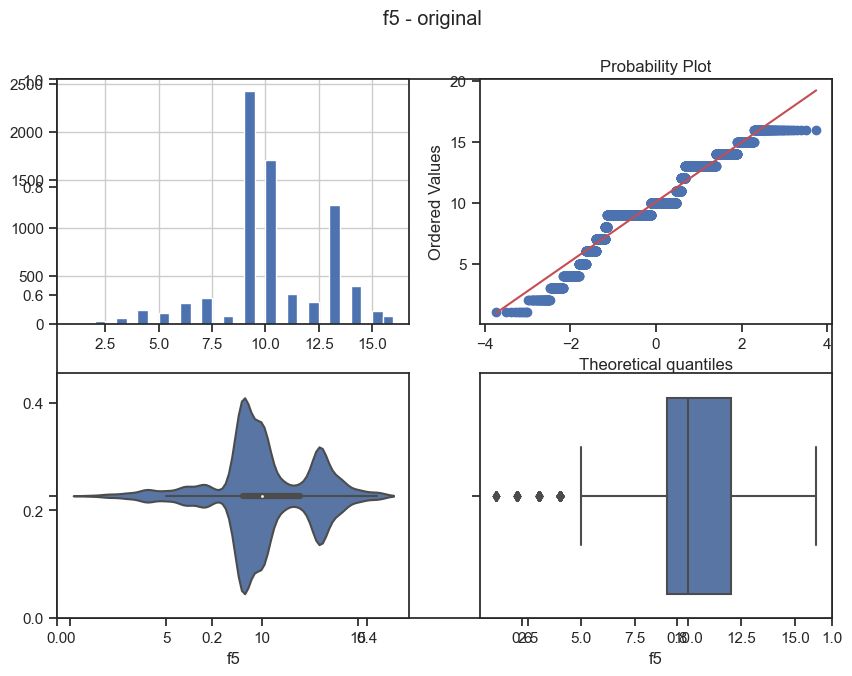

In [44]:
diagnostic_plots(X_ALL, 'f5', 'f5 - original')

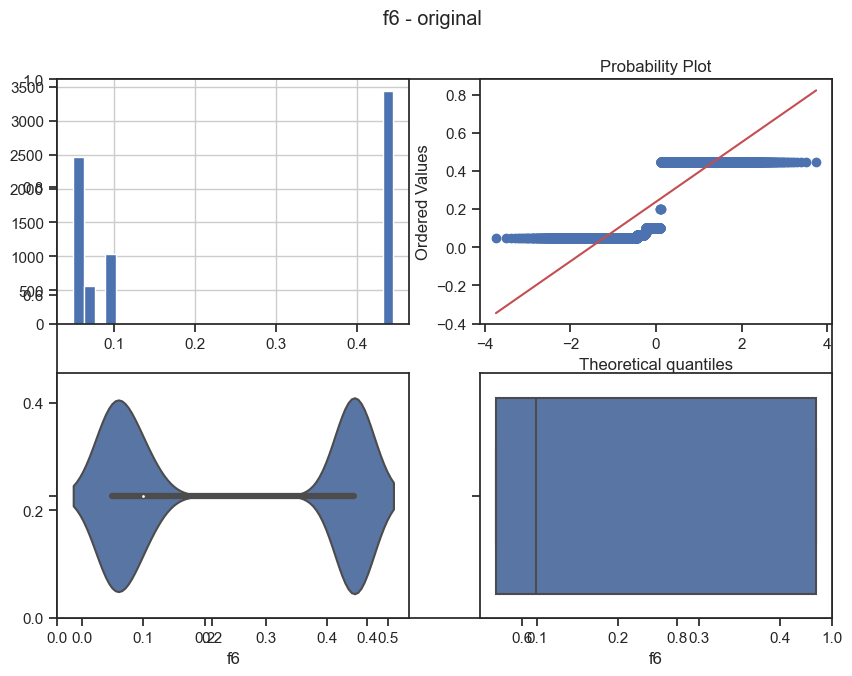

In [45]:
diagnostic_plots(X_ALL, 'f6', 'f6 - original')

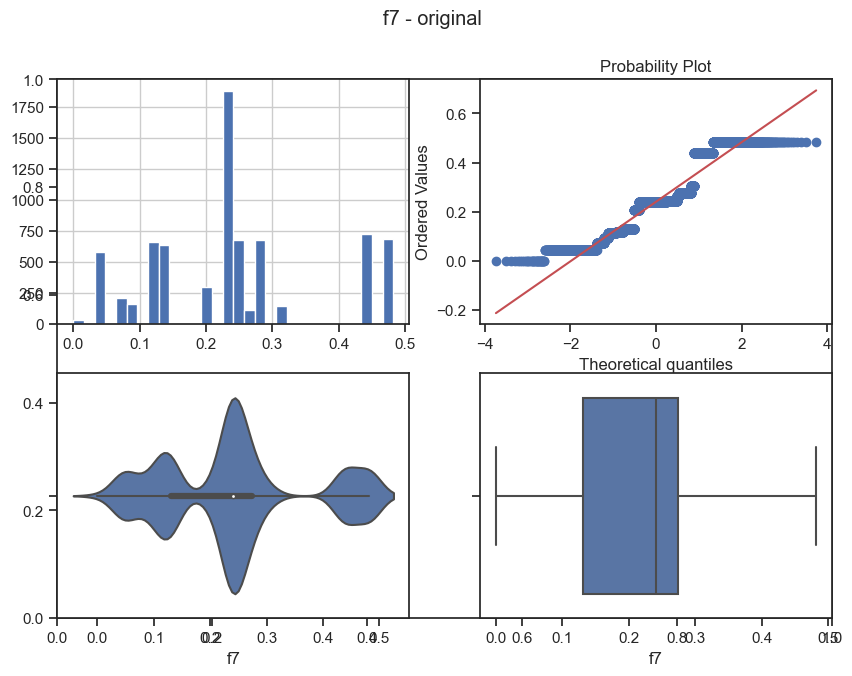

In [46]:
diagnostic_plots(X_ALL, 'f7', 'f7 - original')

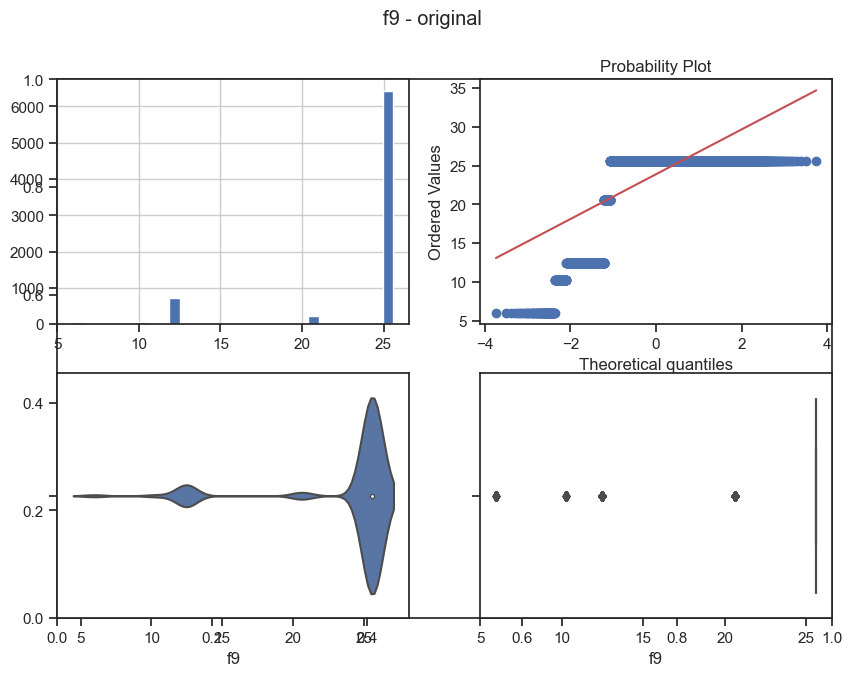

In [47]:
diagnostic_plots(X_ALL, 'f9', 'f9 - original')

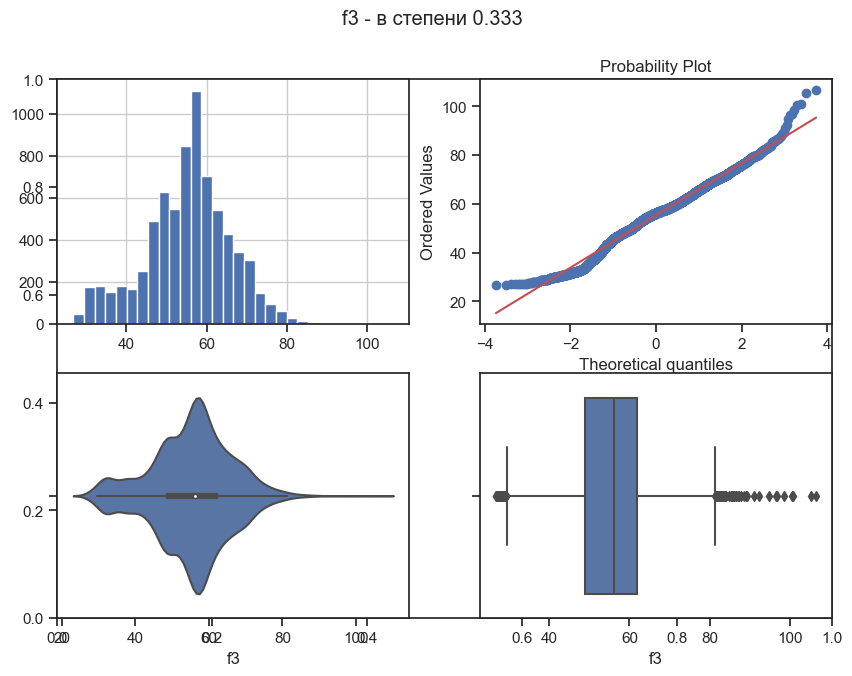

In [48]:
# Нормализация f3
X_ALL['f3'] = X_ALL['f3']**(0.333)
diagnostic_plots(X_ALL, 'f3', 'f3 - в степени 0.333')

In [49]:
X_ALL

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14
0,50,218.593930,64.643643,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,49,0.100000
1,32,276.771005,55.530503,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,60,0.244418
2,38,218.593930,30.578341,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,50,0.244418
3,19,218.593930,75.028133,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,35,0.244418
4,44,218.593930,47.633458,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,46,0.185185
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,68.796734,0.171817,9,0.066372,0.240556,0.066581,25.606721,0.113590,40,0.244418
7496,25,218.593930,46.911712,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,50,0.244418
7497,50,218.593930,54.366528,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,45,0.244418
7498,51,276.771005,55.691145,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,40,0.244418


In [50]:
#Маcштабирование признаков. В наших данных у всех признаков длинные хвосты(выбросы). Качество моделей KNN, LinearRegression и SVС сильно зависят от наличия выбросов. Для устранения выбросов применим метод масштабирования по медиане RobustScaler и до разделения данных на обучаемую(train) и тестовую(в данном случае var).


In [51]:
from sklearn.preprocessing import RobustScaler
Rb_scaler = RobustScaler()
data_rb = Rb_scaler.fit_transform(X_ALL)
X_ALL_scaler = pd.DataFrame(data_rb, columns=X_ALL.columns)

In [52]:
X_ALL_scaler

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14
0,0.684211,0.00000,0.651294,-1.107380,-2.000000,0.874437,0.237325,0.903527,-19.636571,0.0,1.8,-0.144418
1,-0.263158,2.86426,-0.050805,0.672025,0.333333,0.874437,1.386877,0.903527,-19.636571,0.0,4.0,0.000000
2,0.052632,0.00000,-1.973183,-2.175307,-1.000000,0.874437,0.237325,0.903527,0.000000,0.0,2.0,0.000000
3,-0.947368,0.00000,1.451341,0.000000,0.000000,-0.125563,-1.366074,-0.247583,0.000000,0.0,-1.0,0.000000
4,0.368421,0.00000,-0.659214,-2.175307,-1.000000,0.000000,-0.871991,-0.096473,-19.636571,-1.0,1.2,-0.059233
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.578947,0.00000,0.971258,-0.111192,-0.333333,-0.082005,0.000000,-0.096473,0.000000,-1.0,0.0,0.000000
7496,-0.631579,0.00000,-0.714819,0.000000,0.000000,-0.125563,-0.762675,0.000000,0.000000,-1.0,2.0,0.000000
7497,0.684211,0.00000,-0.140481,-0.111192,-0.333333,0.874437,1.688074,0.903527,0.000000,0.0,1.0,0.000000
7498,0.736842,2.86426,-0.038429,-0.111192,-0.333333,-0.125563,-1.024434,0.000000,0.000000,0.0,0.0,0.000000


In [53]:
X_ALL_scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
f1,7500.0,8.313684e-02,0.718301,-1.052632,-0.473684,0.000000e+00,0.526316,2.789474
f2,7500.0,1.000000e+00,3.732700,-7.598444,0.000000,0.000000e+00,1.000000,17.566652
f3,7500.0,-6.991796e-02,0.831431,-2.269163,-0.564661,-2.737204e-16,0.435339,3.879537
f4,7500.0,8.831358e-01,2.248000,-2.656224,-0.111192,0.000000e+00,0.888808,8.148260
f5,7500.0,2.773333e-02,0.848690,-3.000000,-0.333333,0.000000e+00,0.666667,2.000000
f6,7500.0,3.538694e-01,0.480635,-0.125563,-0.125563,0.000000e+00,0.874437,0.874437
f7,7500.0,3.382183e-16,0.891473,-1.680315,-0.762675,0.000000e+00,0.237325,1.688074
f8,7500.0,3.597840e-01,0.511884,-0.247583,-0.096473,0.000000e+00,0.903527,1.009526
f9,7500.0,-1.713387e+00,4.451530,-19.636571,0.000000,0.000000e+00,0.000000,0.000000
f10,7500.0,-3.286667e-01,0.469760,-1.000000,-1.000000,0.000000e+00,0.000000,0.000000


### 3. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче? 

In [54]:
# Ваш код здесь
global_mean = Xtrain.target.mean()
round(global_mean, 3)

0.239

In [55]:
#В нашем наборе данных оказалось 23,9% данных в целевой переменной (target)класса 1, класс 0 доминирует над классом 1. Cледовательно, использовать accuracy как метрику качества нельзя.

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test); 
- обучите KNN, LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test) и вычислите значение метрики f1.

In [56]:
from sklearn.metrics import f1_score
X = X_ALL_scaler.copy()
y = y.copy()
# Ваш код здесь
X_train, X_var, y_train, y_var = train_test_split(X, y, train_size=0.7, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.7, random_state=1)

In [57]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [58]:
print('Точность для обучающей выборки:', knn.score(X_train, y_train))
print('Точность для тестовой выборки:', knn.score(X_var, y_var))

Точность для обучающей выборки: 0.862003266194883
Точность для тестовой выборки: 0.8084444444444444


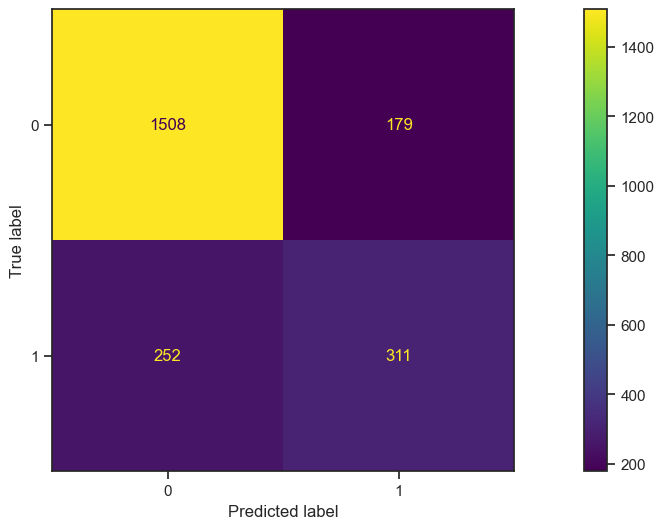

In [59]:
cm = confusion_matrix(y_var, knn.predict(X_var), labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [60]:
f1 = f1_score(y_var, knn.predict(X_var))
print(f"F1-мера: {f1:.2f}")

F1-мера: 0.59


In [61]:
print(classification_report(y_var, knn.predict(X_var)))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1687
           1       0.63      0.55      0.59       563

    accuracy                           0.81      2250
   macro avg       0.75      0.72      0.73      2250
weighted avg       0.80      0.81      0.80      2250



In [62]:
# Ваш код здесь
# Подбор k на валидационной выборке:
for k in range(1, 11):
    y_predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_val)
    print(f"k = {k}; accuracy = {np.mean(y_predicted==y_val):.3f}")


k = 1; accuracy = 0.765
k = 2; accuracy = 0.788
k = 3; accuracy = 0.785
k = 4; accuracy = 0.803
k = 5; accuracy = 0.805
k = 6; accuracy = 0.803
k = 7; accuracy = 0.812
k = 8; accuracy = 0.803
k = 9; accuracy = 0.805
k = 10; accuracy = 0.803


In [63]:
#Использую библиотеку mlxtend (ExhaustiveFeatureSelector). В данной библиотеке реализована селекция признаков во всех возможных комбинациях в заданном диапазоне для выборки и оценки.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

efs = EFS(knn,
           min_features=4,
           max_features=12,
           scoring='f1',
           print_progress=True,
           cv=5,
           n_jobs=-1)

efs = efs.fit(X, y)

print('Лучшая f1: %.2f' % efs.best_score_)
print('Лучшее подмножество (переменных):', efs.best_idx_)
print('Лучшее подмножество названия переменных:', efs.best_feature_names_)

In [ ]:
X1 = X_ALL_scaler[['f1', 'f2', 'f4', 'f7', 'f8', 'f10', 'f13', 'f14']].copy()
y1 = y.copy()

In [ ]:
X_train1, X_var1, y_train1, y_var1 = train_test_split(X1, y1, train_size=0.7, random_state=1)

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn1.fit(X_train1, y_train1)

In [ ]:
cm1 = confusion_matrix(y_var1, knn1.predict(X_var1), labels=knn1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=knn1.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_var1, knn_predictions_var1))

In [ ]:
# Модель - LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
y_pred_var = logreg.predict(X_var)

In [ ]:
print('Точность для обучающей выборки:', logreg.score(X_train, y_train))
print('Точность для тестовой выборки:', logreg.score(X_var, y_var))

In [ ]:
cm = confusion_matrix(y_var, y_pred_var, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

In [ ]:
f1 = f1_score(y_var, y_pred_var)
print(f"F1-мера: {f1:.2f}")

In [ ]:
print(classification_report(y_var, y_pred_var))

In [ ]:
lr = LogisticRegression(class_weight='balanced',
                        solver='newton-cholesky',
                        random_state=1)

efs2 = EFS(lr,
           min_features=4,
           max_features=12,
           scoring='f1',
           print_progress=True,
           cv=5,
           n_jobs=-1)

efs2 = efs2.fit(X, y)

print('Лучшая f1: %.2f' % efs2.best_score_)
print('Лучшее подмножество (переменных):', efs2.best_idx_)
print('Лучшее подмножество названия переменных:', efs2.best_feature_names_)

In [ ]:
X1 = X_ALL_scaler[['f1', 'f2', 'f3', 'f4', 'f5', 'f7', 'f8', 'f9', 'f10', 'f13', 'f14']].copy()
y1 = y.copy()

In [ ]:
X_train1, X_var1, y_train1, y_var1 = train_test_split(X1, y1, train_size=0.7, random_state=1)

In [ ]:
logreg1 = LogisticRegression(class_weight='balanced',
                            solver='newton-cholesky',
                            random_state=1)

logreg1.fit(X_train1, y_train1)
y_pred_train1 = logreg1.predict(X_train1)
y_pred_var1 = logreg1.predict(X_var1)

In [ ]:
print('Точность для обучающей выборки:', logreg1.score(X_train1, y_train1))
print('Точность для тестовой выборки:', logreg1.score(X_var1, y_var1))

In [ ]:
cm = confusion_matrix(y_var1, y_pred_var1, labels=logreg1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg1.classes_)
disp.plot()
plt.show()

In [ ]:
f1 = f1_score(y_var1, y_pred_var1)
print(f"F1-мера: {f1:.2f}")

In [ ]:
# Модель SVC (Опорных векторов для классификации)
## Линейная функция ядра
svc_linear = SVC(kernel='linear',
                 #probability=True,
                 random_state=1,
                 C=1)

svc_linear.fit(X_train, y_train)
y_pred_train_svc = svc_linear.predict(X_train)
y_pred_var_svc = svc_linear.predict(X_var)

In [ ]:
print('Точность для обучающей выборки:', svc_linear.score(X_train, y_train))
print('Точность для тестовой выборки:', svc_linear.score(X_var, y_var))

In [ ]:
cm = confusion_matrix(y_var, y_pred_var_svc, labels=svc_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_linear.classes_)
disp.plot()
plt.show()

In [ ]:
f1 = f1_score(y_var, y_pred_var_svc)
print(f"F1-мера: {f1:.2f}")

In [ ]:
print(classification_report(y_var, y_pred_var_svc))

In [ ]:
# Ядро радиальной базисной функции (RBF)
svc_rbf = SVC(kernel='rbf',
                random_state=1,
                C=1)

svc_rbf.fit(X_train, y_train)
y_pred_train_svc_rbf = svc_rbf.predict(X_train)
y_pred_var_svc_rbf = svc_rbf.predict(X_var)

In [ ]:
print('Точность для обучающей выборки:', svc_rbf.score(X_train, y_train))
print('Точность для тестовой выборки:', svc_rbf.score(X_var, y_var))

In [ ]:
cm = confusion_matrix(y_var, y_pred_var_svc_rbf, labels=svc_rbf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_rbf.classes_)
disp.plot()
plt.show()

In [ ]:
f1 = f1_score(y_var, y_pred_var_svc_rbf)
print(f"F1-мера: {f1:.2f}")

In [ ]:
print(classification_report(y_var, y_pred_var_svc_rbf))

In [ ]:
## Полиномиальное ядро
svc_poly = SVC(kernel='poly',
                #probability=True,
                random_state=1,
                C=1)

svc_poly.fit(X_train, y_train)
y_pred_train_svc_poly = svc_poly.predict(X_train)
y_pred_var_svc_poly = svc_poly.predict(X_var)

In [ ]:
print('Точность для обучающей выборки:', svc_poly.score(X_train, y_train))
print('Точность для тестовой выборки:', svc_poly.score(X_var, y_var))

In [ ]:
cm = confusion_matrix(y_var, y_pred_var_svc_poly, labels=svc_poly.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_poly.classes_)
disp.plot()
plt.show()

In [ ]:
f1 = f1_score(y_var, y_pred_var_svc_poly)
print(f"F1-мера: {f1:.2f}")

In [ ]:
print(classification_report(y_var, y_pred_var_svc_poly))

In [ ]:
## Сигмовидное ядро
svc_sigm = SVC(kernel='sigmoid',
                #probability=True,
                random_state=1,
                C=1)

svc_sigm.fit(X_train, y_train)
y_pred_train_svc_sigm = svc_sigm.predict(X_train)
y_pred_var_svc_sigm = svc_sigm.predict(X_var)

In [ ]:
print('Точность для обучающей выборки:', svc_sigm.score(X_train, y_train))
print('Точность для тестовой выборки:', svc_sigm.score(X_var, y_var))

In [ ]:
cm = confusion_matrix(y_var, y_pred_var_svc_sigm, labels=svc_sigm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_sigm.classes_)
disp.plot()
plt.show()

In [ ]:
f1 = f1_score(y_var, y_pred_var_svc_sigm)
print(f"F1-мера: {f1:.2f}")

In [ ]:
print(classification_report(y_var, y_pred_var_svc_sigm))

In [ ]:
#Лучшая модель опорных векторов SVC - линейная. f1 = 0.58. Для данной модели введем параметр class_weight='balanced'
svc_linear1 = SVC(kernel='linear',
                  class_weight='balanced',
                  random_state=1,
                  C=1)

svc_linear1.fit(X_train, y_train)
y_pred_train_svc1 = svc_linear1.predict(X_train)
y_pred_var_svc1 = svc_linear1.predict(X_var)

In [ ]:
print('Точность для обучающей выборки:', svc_linear1.score(X_train, y_train))
print('Точность для тестовой выборки:', svc_linear1.score(X_var, y_var))

In [ ]:
cm = confusion_matrix(y_var, y_pred_var_svc1, labels=svc_linear1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_linear1.classes_)
disp.plot()
plt.show()

In [ ]:
f1 = f1_score(y_var, y_pred_var_svc1)
print(f"F1-мера: {f1:.2f}")

In [ ]:
print(classification_report(y_var, y_pred_var_svc1))

In [ ]:
#Построим модель SVC на тех же отобранных переменных, что и KNN и LogisticRegression
svc_linear2 = SVC(kernel='linear',
                  class_weight='balanced',
                  random_state=1,
                  C=1)

svc_linear2.fit(X_train1, y_train1)
y_pred_train_svc2 = svc_linear2.predict(X_train1)
y_pred_var_svc2 = svc_linear2.predict(X_var1)

In [ ]:
print('Точность для обучающей выборки:', svc_linear2.score(X_train1, y_train1))
print('Точность для тестовой выборки:', svc_linear2.score(X_var1, y_var1))

In [ ]:
cm = confusion_matrix(y_var, y_pred_var_svc2, labels=svc_linear2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_linear2.classes_)
disp.plot()
plt.show()

In [ ]:
f1 = f1_score(y_var1, y_pred_var_svc2)
print(f"F1-мера: {f1:.2f}")

In [ ]:
print(classification_report(y_var1, y_pred_var_svc2))

In [ ]:
### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:

можете подбирать гиперпараметры моделей (лучше это делать по кросс-валидации на Train, то есть с помощью использования GridSearchCV на Train);
можете задавать class_weights;
можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.
Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [ ]:
# Подбор гиперпараметров методом RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [ ]:
X2 = X_ALL_scaler[['f1', 'f2', 'f3', 'f4', 'f5', 'f7', 'f8', 'f9', 'f10', 'f13', 'f14']].copy()
y2 = y.copy()

In [ ]:
Xtrain, Xvar, ytrain, yvar = train_test_split(X2, y2, train_size=0.7, random_state=1)

In [ ]:
logi = LogisticRegression(class_weight='balanced',
                        solver='newton-cholesky',
                        random_state=1)
logi.fit(Xtrain, ytrain)

y_predict = logi.predict(Xvar)
# Get predicted probability
logi_predict_prob = logi.predict_proba(Xvar)[:,1]

In [ ]:
# Print default setting
logi.get_params()

In [ ]:
# Define the search space
distributions ={"C":(0, 10), "penalty":["l1","l2"]}# l1 lasso l2 ridge

# Set up score
scoring = ['f1']

# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
# Define random search
random_search = RandomizedSearchCV(estimator=logi,
                           param_distributions=distributions,
                           n_iter=48,
                           scoring=scoring,
                           refit='f1',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=True)

# Fit grid search
random_result = random_search.fit(Xtrain, ytrain)
random_result.best_params_

In [ ]:
grid_search =GridSearchCV(estimator=logi,
                           param_grid=distributions,
                           scoring=scoring,
                           refit='f1',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=True)

# Fit grid search
grid_result = grid_search.fit(Xtrain, ytrain)
grid_result.best_params_

In [ ]:
space = {'C' : hp.choice('C', [1e-5, 1e-2, 0.1, 1, 10, 100])}

In [ ]:
# Objective function
def objective(params):

    logi1 = LogisticRegression(**params)
    score = cross_val_score(estimator=logi1,
                            X=Xtrain,
                            y=ytrain,
                            cv=kfold,
                            scoring='f1',
                            n_jobs=-1).mean()

    # Loss is negative score
    loss = - score

    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [ ]:
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = Trials())

In [ ]:
# Print the index of the best parameters
print(best)

# Print the values of the best parameters
print(space_eval(space, best))

In [ ]:
logi2 = LogisticRegression(C=10,
                           penalty='l2',
                           class_weight='balanced',
                           solver='newton-cholesky',
                           random_state=1)

logi2.fit(Xtrain, ytrain)

y_predict_train1 = logi2.predict(Xtrain)
y_predict_var1 = logi2.predict(Xvar)

In [ ]:
print('Точность для обучающей выборки:', logi2.score(Xtrain, ytrain))
print('Точность для тестовой выборки:', logi2.score(Xvar, yvar))

In [ ]:
cm = confusion_matrix(yvar, y_predict_var1, labels=logi2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logi2.classes_)
disp.plot()
plt.show()

In [ ]:
f1 = f1_score(yvar, y_predict_var1)
print(f"F1-мера: {f1:.2f}")

In [ ]:
print(classification_report(yvar, y_predict_var1))

In [ ]:
# Рассчет AUC
roc_auc_score(yvar, y_predict_var1)

In [ ]:
svc_linear3 = SVC(kernel='linear',
                  class_weight='balanced',
                  random_state=1)

svc_linear3.fit(Xtrain, ytrain)

y_pred_train_svc3 = svc_linear3.predict(Xtrain)
y_pred_var_svc3 = svc_linear3.predict(Xvar)

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
parameters = {'C': [1, 3, 4, 5], 'kernel': ['linear']}
grid_search = GridSearchCV(estimator = svc_linear3 ,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = kfold,
                           n_jobs = -1)
grid_search = grid_search.fit(Xtrain, ytrain)

In [ ]:
grid_search.best_params_

In [ ]:
f1 = grid_search.best_score_
f1

In [ ]:
#Лучшее значение C для модели опорных векторов = 1. Это базовоз значение параметра С. Данный вариант модели получен ранее. f1 = 0.63.

In [ ]:
#Лучшая модель - LogisticRegression с оптимизированными гиперпараметрами f1 = 0.66

### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [101]:
# Ваш код здесь
Xtest = df_test.drop('target', axis=1)
ytest = df_test['target']
Xtest

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,20,0.238933
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,40,0.238933
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,20,0.238933
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,20,0.238933
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,40,0.238933
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,40,238.933333,220589,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,40,0.238933
2496,54,238.933333,165278,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,40,0.238933
2497,44,238.933333,398473,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,70,0.238933
2498,35,238.933333,183898,0.238933,11,0.238933,0.238933,0.238933,23.893333,0.238933,50,0.238933


In [102]:
#Нормализуем параметр f3
Xtest['f3'] = Xtest['f3']**(0.333)

In [103]:
Xtest.isnull().sum()

f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f13    0
f14    0
dtype: int64

In [104]:
Xtest.describe().T

,count,mean,std,min,25%,50%,75%,max
f1,2500.0,38.069200,1.344217e+01,17.000000,27.000000,37.000000,47.000000,90.000000
f2,2500.0,238.933333,5.912898e-12,238.933333,238.933333,238.933333,238.933333,238.933333
f3,2500.0,55.349968,1.094025e+01,26.736563,49.009142,55.974678,61.789753,96.477051
f4,2500.0,0.238933,1.424146e-14,0.238933,0.238933,0.238933,0.238933,0.238933
f5,2500.0,10.056800,2.554875e+00,1.000000,9.000000,10.000000,12.000000,16.000000
f6,2500.0,0.238933,1.424146e-14,0.238933,0.238933,0.238933,0.238933,0.238933
f7,2500.0,0.238933,1.424146e-14,0.238933,0.238933,0.238933,0.238933,0.238933
f8,2500.0,0.238933,1.424146e-14,0.238933,0.238933,0.238933,0.238933,0.238933
f9,2500.0,23.893333,9.594246e-14,23.893333,23.893333,23.893333,23.893333,23.893333
f10,2500.0,0.238933,1.424146e-14,0.238933,0.238933,0.238933,0.238933,0.238933


In [105]:
Xtest_new = Xtest[['f1', 'f2', 'f3', 'f4', 'f5', 'f7', 'f8', 'f9', 'f10', 'f13', 'f14']].copy()
Xtest_new

,f1,f2,f3,f4,f5,f7,f8,f9,f10,f13,f14
0,31,238.933333,36.034336,0.238933,10,0.238933,0.238933,23.893333,0.238933,20,0.238933
1,24,238.933333,31.992655,0.238933,7,0.238933,0.238933,23.893333,0.238933,40,0.238933
2,18,238.933333,65.406295,0.238933,7,0.238933,0.238933,23.893333,0.238933,20,0.238933
3,19,238.933333,72.978426,0.238933,9,0.238933,0.238933,23.893333,0.238933,20,0.238933
4,28,238.933333,58.292799,0.238933,10,0.238933,0.238933,23.893333,0.238933,40,0.238933
...,...,...,...,...,...,...,...,...,...,...,...
2495,40,238.933333,60.174629,0.238933,10,0.238933,0.238933,23.893333,0.238933,40,0.238933
2496,54,238.933333,54.659495,0.238933,10,0.238933,0.238933,23.893333,0.238933,40,0.238933
2497,44,238.933333,73.271121,0.238933,10,0.238933,0.238933,23.893333,0.238933,70,0.238933
2498,35,238.933333,56.637509,0.238933,11,0.238933,0.238933,23.893333,0.238933,50,0.238933


In [106]:
Rb_scaler = RobustScaler()
data_rb1 = Rb_scaler.fit_transform(Xtest_new)
Xtest_scaler = pd.DataFrame(data_rb1, columns=Xtest_new.columns)

In [107]:
Xtest_scaler

,f1,f2,f3,f4,f5,f7,f8,f9,f10,f13,f14
0,-0.30,0.0,-1.560202,0.0,0.000000,0.0,0.0,0.0,0.0,-3.2,0.0
1,-0.65,0.0,-1.876438,0.0,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.95,0.0,0.737963,0.0,-1.000000,0.0,0.0,0.0,0.0,-3.2,0.0
3,-0.90,0.0,1.330433,0.0,-0.333333,0.0,0.0,0.0,0.0,-3.2,0.0
4,-0.45,0.0,0.181378,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2495,0.15,0.0,0.328619,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2496,0.85,0.0,-0.102905,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.35,0.0,1.353334,0.0,0.000000,0.0,0.0,0.0,0.0,4.8,0.0
2498,-0.10,0.0,0.051862,0.0,0.333333,0.0,0.0,0.0,0.0,1.6,0.0


In [109]:
ytest_predict = logi2.predict(Xtest_scaler)

NameError: name 'logic' is not defined

In [110]:
print('Точность для обучающей выборки:', logi2.score(Xtrain, ytrain))
print('Точность для тестовой выборки:', logi2.score(Xtest_scaler, ytest))

NameError: name 'logi2' is not defined

In [111]:
cm = confusion_matrix(ytest, ytest_predict, labels=logi2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logi2.classes_)
disp.plot()
plt.show()

NameError: name 'ytest_predict' is not defined

In [ ]:
f1 = f1_score(ytest, ytest_predict)
print(f"F1-мера: {f1:.2f}")

In [ ]:
print(classification_report(ytest, ytest_predict))

### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [100]:
# Ваш код здесь
from sklearn.ensemble import StackingClassifier

estimators = [('lr', LogisticRegression(C=10,
                                        penalty='l2',
                                        class_weight='balanced',
                                        solver='newton-cholesky',
                                        random_state=1)),
              ('svc', SVC(kernel='linear',
                          class_weight='balanced',
                          random_state=1,
                          C=1))]
model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(C=10,
                                                                                     penalty='l2',
                                                                                     class_weight='balanced',
                                                                                     solver='newton-cholesky',
                                                                                     random_state=1),
                           stack_method='predict')

model.fit(Xtrain, ytrain)
pred_train=model.predict(Xtrain)
pred_test=model.predict(Xvar)

NameError: name 'ytrain' is not defined

In [ ]:
print('Точность для обучающей выборки:', model.score(Xtrain, ytrain))
print('Точность для тестовой выборки:', model.score(Xvar, yvar))

In [ ]:
cm = confusion_matrix(yvar, pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
f1 = f1_score(yvar, pred_test)
print(f"F1-мера: {f1:.2f}")

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке? 
- Ваша модель переобучилась, недообучилась или обучилась как надо?

In [99]:
# Ваш текст здесь
#Какие подходы вы использовали для улучшения работы baseline-моделей?
#Ответ:
#1. Для моделей KNN (метод ближайших соседей) и LogisticRegression использую библиотеку mlxtend (ExhaustiveFeatureSelector) для  селекции признаков во всевозможных комбинациях в заданном диапазоне для выборки и оценки.
#2. Для модели KNN подбрала лучший вариант k "соседей" на валидационной выборке.
#3. Для моделей LogisticRegression и SVC (метод опорных векторов для классификации), использовала гиперпараметр class_weight='balanced' для улучшения баланса между классами (при несбалансированной выборки).
#4. Для моделей LogisticRegression и SVC подобрала методом GridSearchCV гиперпараметр C.

In [ ]:
#Какого максимального качества удалось добиться на Test-данных?
# Ответ:
#1. Для модели LogisticRegression f1 = 0.66 AUC = 0.807 (хороший результат модели на тестовой выборкe).

In [ ]:
#Какое при этом получилось качество на отложенной выборке?
# Ответ:
#1. Результат на отложенной выборки очень плохой f1 = 0.06.
#Причины:
#в отложенной выборке в отличие от тестовой переменные f2, f4, f6, f7, f8, f9, f10, f14 это константы. И модель не может отличить в этих переменных классы. Такие данные очень некорректные.

In [ ]:
#Ваша модель переобучилась, недообучилась или обучилась как надо?
# Ответ:
#1. Мои модели обучились как надо. Во всех моделях разница между train  и test (я обозначила var) незначительная.

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.